<a href="https://colab.research.google.com/github/Abhicoder03/RPIP_Group_8/blob/main/RPIP_Recsys_Phones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOAD DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Import Dataset and PreProcessing

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/RPIP_RecSys/20191226-reviews.csv', low_memory=False)
df

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN


In [ ]:
df['asin'].nunique()

720

In [ ]:
df['body'].isnull().sum()

26

In [ ]:
df = df.dropna(subset=['body'])
df['body'].isnull().sum()

0

In [ ]:
asin_counts = df['asin'].value_counts()
mask = df['asin'].isin(asin_counts[asin_counts >= 400].index)
df = df[mask]

In [ ]:
df

,asin,name,rating,date,verified,title,body,helpfulVotes
2365,B00836Y6B2,ellen in nj,3,"July 22, 2013",True,Want to love it but...,I want to love this phone because there is a l...,5.0
2366,B00836Y6B2,vanessa982,4,"May 28, 2013",True,Tmobile service issue otherwise I love it!,I got my phone on Saturday after reviewing the...,10.0
2367,B00836Y6B2,Mr. Evolution,5,"November 9, 2013",True,This one is definitely worth looking into,"I've had my phone for about 3 1/2 weeks now, s...",1.0
2368,B00836Y6B2,gilberto siles,4,"November 26, 2014",True,-has a great camera -it is easy to use and und...,I will put it this way. I bought this cellphon...,NaN
2369,B00836Y6B2,Olivia,4,"January 13, 2013",True,In love with it,"Before I comment on the product, I must mentio...",19.0
...,...,...,...,...,...,...,...,...
66767,B07WSJYDXX,Amazon Customer,1,"September 1, 2019",False,Device is not unlocked.,The phone is locked to AT&T despite what the l...,NaN
66768,B07WSJYDXX,KLH,1,"September 8, 2018",False,Big mistake,I got this as a replacement from my carrier fo...,4.0
66769,B07WSJYDXX,Amazon Customer,4,"August 18, 2019",False,phone,works,NaN
66770,B07WSJYDXX,Anonymous,1,"February 25, 2019",False,died already,This lasted maybe 6 months and died... not happy.,NaN


In [ ]:
df['asin'].nunique()

42

In [ ]:
import pandas as pd
import nltk
from nltk import pos_tag, word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter,defaultdict
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
opinion_words = set(opinion_lexicon.words())
from nltk.sentiment.util import mark_negation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import string

# Preprocess text
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    try:

        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalnum()]
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return tokens

    except AttributeError:  # Catch AttributeError if input is not convertible to string
        return []  # Return empty list if input cannot be converted to string

# Apply preprocessing to reviewText column
df['clean_text'] = df['body'].apply(preprocess_text)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import string

# Preprocess text
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    try:
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        processed_text = ' '.join(tokens)

        return processed_text
    except AttributeError:
        return ""

In [ ]:
df['clean_text'] = df['body'].apply(preprocess_text)

In [ ]:
df['clean_text']

2365     want love phone lot love two thing frustrated ...
2366     got phone saturday reviewing customer review y...
2367     ive phone 3 12 week think time write review le...
2368     put way bought cellphone breed gave product 4 ...
2369     comment product must mention received att box ...
                               ...                        
66767               phone locked att despite listing claim
66768    got replacement carrier previous moto x phone ...
66769                                                 work
66770                      lasted maybe 6 month died happy
66771    good phone wifi calling unlocked must come att...
Name: clean_text, Length: 24356, dtype: object

#Extract Bi-Grams and Unigrams

In [ ]:
def extract_bigram_features(text):
    # Tokenize sentences
    sentences = sent_tokenize(text)
    opinion_words = set(opinion_lexicon.words())

    # Initialize lists to store extracted features
    bi_grams = []
    # Define part-of-speech patterns
    AN_pattern = [('JJ', 'NN'), ('JJ', 'NNS')]  # Adjective-Noun pattern
    NN_pattern = [('NN', 'NN'), ('NNS', 'NN')]  # Noun-Noun pattern
    for sentence in sentences:
        # Tokenize words and get part-of-speech tags
        tokens = word_tokenize(sentence.lower())
        pos_tags = nltk.pos_tag(tokens)

        # Extract bi-grams based on part-of-speech patterns
        for i in range(len(pos_tags) - 1):
            if (pos_tags[i][1], pos_tags[i+1][1]) in AN_pattern and pos_tags[i][0] not in     opinion_words:
                bi_grams.append((pos_tags[i][0], pos_tags[i+1][0]))
            if (pos_tags[i][1], pos_tags[i+1][1]) in NN_pattern:
                bi_grams.append((pos_tags[i][0], pos_tags[i+1][0]))
    return bi_grams

In [ ]:
df['bi_grams']= df['body'].apply(extract_bigram_features)

In [ ]:
pip install torch --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.7 MB/s eta 0:00:00
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
pip install spacy --upgrade

In [ ]:
'''
import spacy
from spacy.tokens import Doc
from nltk.corpus import opinion_lexicon, stopwords
from concurrent.futures import ProcessPoolExecutor
import pandas as pd

# Load spaCy model
nlp = spacy.load("en_core_web_sm", disable=["ner", "lemmatizer"])

# Set of opinion words and stopwords
opinion_words = set(opinion_lexicon.words())
stop_words = set(stopwords.words('english'))

def extract_unigram_features(text):
    # Process text with spaCy
    doc = nlp(text.lower())

    # Initialize dictionary for noun frequencies
    noun_frequency = {}
    sentiment_present = any(token.text in opinion_words for token in doc)

    # Extract nouns and calculate frequencies
    for token in doc:
        if token.pos_ == 'NOUN' and token.text not in stop_words:
            increment = 2 if sentiment_present else 1
            noun_frequency[token.text] = noun_frequency.get(token.text, 0) + increment

    # Calculate total frequency and apply threshold
    total_frequency = sum(noun_frequency.values())
    threshold = 0.1  # Frequency threshold
    single_nouns = [noun for noun, frequency in noun_frequency.items() if frequency / total_frequency > threshold]

    print(single_nouns)
    return single_nouns


def apply_parallel(df, func):
    with ProcessPoolExecutor() as executor:
        results = list(executor.map(func, df['clean_text']))
    return results
'''

'\nimport spacy\nfrom spacy.tokens import Doc\nfrom nltk.corpus import opinion_lexicon, stopwords\nfrom concurrent.futures import ProcessPoolExecutor\nimport pandas as pd\n\n# Load spaCy model\nnlp = spacy.load("en_core_web_sm", disable=["ner", "lemmatizer"])\n\n# Set of opinion words and stopwords\nopinion_words = set(opinion_lexicon.words())\nstop_words = set(stopwords.words(\'english\'))\n\ndef extract_unigram_features(text):\n    # Process text with spaCy\n    doc = nlp(text.lower())\n\n    # Initialize dictionary for noun frequencies\n    noun_frequency = {}\n    sentiment_present = any(token.text in opinion_words for token in doc)\n\n    # Extract nouns and calculate frequencies\n    for token in doc:\n        if token.pos_ == \'NOUN\' and token.text not in stop_words:\n            increment = 2 if sentiment_present else 1\n            noun_frequency[token.text] = noun_frequency.get(token.text, 0) + increment\n\n    # Calculate total frequency and apply threshold\n    total_frequ

In [ ]:
'''
df['unigram'] = apply_parallel(df, extract_unigram_features)
'''

"\ndf['unigram'] = apply_parallel(df, extract_unigram_features)\n"

Unigram corrected

In [ ]:
import spacy
from spacy.tokens import Doc
from nltk.corpus import opinion_lexicon, stopwords
from concurrent.futures import ProcessPoolExecutor
import pandas as pd
from functools import partial

# Load spaCy model
nlp = spacy.load("en_core_web_sm", disable=["ner", "lemmatizer"])

# Set of opinion words and stopwords
opinion_words = set(opinion_lexicon.words())
stop_words = set(stopwords.words('english'))

def extract_unigram_features(text, opinion_words, stop_words):
    # Process text with spaCy
    doc = nlp(text.lower())

    # Check for sentiment words presence
    sentiment_present = any(token.text in opinion_words for token in doc)

    # Initialize dictionary for noun frequencies
    noun_frequency = {}

    # Extract nouns and calculate frequencies
    for token in doc:
        if token.pos_ == 'NOUN' and token.text not in stop_words:
            increment = 2 if sentiment_present else 1
            noun_frequency[token.text] = noun_frequency.get(token.text, 0) + increment

    # Calculate total frequency and apply threshold
    total_frequency = sum(noun_frequency.values())
    threshold = 0.2  # Frequency threshold
    single_nouns = [noun for noun, frequency in noun_frequency.items() if frequency / total_frequency > threshold]

    return single_nouns

def apply_parallel(df, func, opinion_words, stop_words):
    # Use functools.partial to create a new function that has some of its parameters pre-filled
    wrapped_func = partial(func, opinion_words=opinion_words, stop_words=stop_words)

    with ProcessPoolExecutor() as executor:
        results = list(executor.map(wrapped_func, df['clean_text']))
    return results

# Example DataFrame loading
# df = pd.DataFrame({'clean_text': ['some example text', 'another example']})

# Apply the function in parallel
df['unigram'] = apply_parallel(df, extract_unigram_features, opinion_words, stop_words)

In [ ]:
df

,asin,name,rating,date,verified,title,body,helpfulVotes,clean_text,bi_grams,unigram
2365,B00836Y6B2,ellen in nj,3,"July 22, 2013",True,Want to love it but...,I want to love this phone because there is a l...,5.0,want love phone lot love two thing frustrated ...,"[(t-mobile, customer), (navigation, app), (dat...",[]
2366,B00836Y6B2,vanessa982,4,"May 28, 2013",True,Tmobile service issue otherwise I love it!,I got my phone on Saturday after reviewing the...,10.0,got phone saturday reviewing customer review y...,"[(demonstrations, i), (sim, card), (data, plan...",[]
2367,B00836Y6B2,Mr. Evolution,5,"November 9, 2013",True,This one is definitely worth looking into,"I've had my phone for about 3 1/2 weeks now, s...",1.0,ive phone 3 12 week think time write review le...,"[(zune, application), (many, apps), (google, p...",[phone]
2368,B00836Y6B2,gilberto siles,4,"November 26, 2014",True,-has a great camera -it is easy to use and und...,I will put it this way. I bought this cellphon...,NaN,put way bought cellphone breed gave product 4 ...,"[(camera, -it), (xbox, games), (microsoft, os)...",[]
2369,B00836Y6B2,Olivia,4,"January 13, 2013",True,In love with it,"Before I comment on the product, I must mentio...",19.0,comment product must mention received att box ...,"[(i, comment), (att, box), (att, logo), (simpl...",[]
...,...,...,...,...,...,...,...,...,...,...,...
66767,B07WSJYDXX,Amazon Customer,1,"September 1, 2019",False,Device is not unlocked.,The phone is locked to AT&T despite what the l...,NaN,phone locked att despite listing claim,[],"[phone, claim]"
66768,B07WSJYDXX,KLH,1,"September 8, 2018",False,Big mistake,I got this as a replacement from my carrier fo...,4.0,got replacement carrier previous moto x phone ...,"[(previous, moto), (many, calls), (bus, apps),...",[]
66769,B07WSJYDXX,Amazon Customer,4,"August 18, 2019",False,phone,works,NaN,work,[],[work]
66770,B07WSJYDXX,Anonymous,1,"February 25, 2019",False,died already,This lasted maybe 6 months and died... not happy.,NaN,lasted maybe 6 month died happy,[],[month]


#Sentiment Analysis

In [ ]:
def load_negation_words(file_path):
    with open(file_path, 'r') as file:
        negation_words = {line.strip().lower() for line in file if line.strip()}
    return negation_words

# Load negation words from the specified file
negation_words = load_negation_words('/content/drive/MyDrive/RPIP_RecSys/negative-words.txt')

In [ ]:
def extract_features_and_sentiments(text, negation_words):
    sentences = sent_tokenize(text)
    feature_sentiments = defaultdict(list)
    opinion_patterns = defaultdict(int)

    for sentence in sentences:
        tokens = word_tokenize(sentence.lower())
        tagged_tokens = pos_tag(tokens)
        features = [word for word, tag in tagged_tokens if tag.startswith('NN')]  # Example feature extraction

        for feature in features:
            distances = {}
            for i, (word, tag) in enumerate(tagged_tokens):
                if word in opinion_words:
                    feature_index = tokens.index(feature)
                    distances[word] = abs(i - feature_index)

            if distances:
                closest_word = min(distances, key=distances.get)
                closest_index = tokens.index(closest_word)
                pattern = tuple(tag for _, tag in tagged_tokens[max(0, closest_index-4):min(len(tokens), closest_index+5)])
                opinion_patterns[pattern] += 1
                feature_sentiments[feature].append((closest_word, closest_index, pattern))

    final_sentiments = {}
    for feature, sentiments in feature_sentiments.items():
        valid_sentiments = []
        for word, index, pattern in sentiments:
            if opinion_patterns[pattern] >= 2:
                # Ensure the range for negation check is within the bounds of the tokens list
                start_index = max(0, index-4)
                end_index = min(len(tokens), index+1)
                negation_present = any(tokens[i] in negation_words for i in range(start_index, end_index))
                sentiment = 'negative' if negation_present else 'positive'
                valid_sentiments.append(sentiment)

        if valid_sentiments:
            sentiment_counts = Counter(valid_sentiments)
            final_sentiments[feature] = max(sentiment_counts, key=sentiment_counts.get)
        else:
            final_sentiments[feature] = 'neutral'

    return final_sentiments

In [ ]:
# Apply the sentiment analysis function to each review
df['sentiment_analysis'] = df['clean_text'].apply(lambda x: extract_features_and_sentiments(x, negation_words))

In [ ]:
df[['clean_text', 'sentiment_analysis']]

,clean_text,sentiment_analysis
2365,want love phone lot love two thing frustrated ...,"{'love': 'negative', 'phone': 'negative', 'lot..."
2366,got phone saturday reviewing customer review y...,"{'phone': 'negative', 'saturday': 'negative', ..."
2367,ive phone 3 12 week think time write review le...,"{'phone': 'positive', 'week': 'positive', 'thi..."
2368,put way bought cellphone breed gave product 4 ...,"{'way': 'positive', 'cellphone': 'positive', '..."
2369,comment product must mention received att box ...,"{'comment': 'negative', 'product': 'negative',..."
...,...,...
66767,phone locked att despite listing claim,{}
66768,got replacement carrier previous moto x phone ...,"{'replacement': 'positive', 'carrier': 'positi..."
66769,work,{'work': 'neutral'}
66770,lasted maybe 6 month died happy,{'month': 'neutral'}


In [ ]:
from collections import Counter

In [ ]:
print(df['asin'].dtype)

object


In [ ]:
def analyze_features(df, product_id):
    p1 = df[df['asin'] == product_id]
    print(f"Number of reviews for product {product_id}: {len(p1)}")  # Debugging line

    feature_counts = Counter()
    sentiment_counts = Counter()

    for _, row in p1.iterrows():
        for feature, sentiment in row['sentiment_analysis'].items():
            feature_counts[feature] += 1
            sentiment_counts[(feature, sentiment)] += 1

    total_reviews = len(p1)
    feature_popularity = {feature: count / total_reviews for feature, count in feature_counts.items()}

    feature_sentiments = {}
    for feature in feature_counts:
        pos = sentiment_counts.get((feature, 'positive'), 0)
        neg = sentiment_counts.get((feature, 'negative'), 0)
        neut = sentiment_counts.get((feature, 'neutral'), 0)
        sent_score = (pos - neg) / (pos + neg + neut) if (pos + neg + neut) != 0 else 0
        feature_sentiments[feature] = sent_score

    case_p = [
        {
            'Feature': feature,
            'Sentiment Score': feature_sentiments[feature],
            'Popularity': feature_popularity[feature]
        } for feature in feature_counts if feature_counts[feature] > 0.1 * total_reviews
    ]
    return case_p

In [ ]:
case_p = analyze_features(df, 'B00836Y6B2')

Number of reviews for product B00836Y6B2: 925


In [ ]:
df_case_p = pd.DataFrame(case_p)
df_case_p

,Feature,Sentiment Score,Popularity
0,phone,0.294559,0.576216
1,use,0.168067,0.128649
2,time,-0.112150,0.115676
3,work,0.526316,0.164324
4,window,0.345794,0.115676


In [ ]:
def calculate_scores_per_product(df_group):
    feature_scores_per_product = []

    total_reviews = len(df_group)  # Total number of reviews in the group

    feature_counts = {}

    for _, row in df_group.iterrows():
        feature_sentiments = row['sentiment_analysis']
        if not isinstance(feature_sentiments, dict):
            continue  # Skip this row if the feature_sentiments is not a dictionary

        for feature, sentiment in feature_sentiments.items():
            if sentiment not in ['positive', 'negative', 'neutral']:
                continue  # Skip if the sentiment is not one of the expected values

            if feature not in feature_counts:
                feature_counts[feature] = {'positive': 0, 'negative': 0, 'neutral': 0, 'reviews': 0}
            feature_counts[feature]['reviews'] += 1  # Increment count of reviews mentioning the feature
            feature_counts[feature][sentiment] += 1

    # Calculate Sent(Fi, P) and Pop(Fi, P) for the current product
    for feature, counts in feature_counts.items():
        pos = counts['positive']
        neg = counts['negative']
        neut = counts['neutral']
        reviews_with_feature = counts['reviews']

        if reviews_with_feature / total_reviews >= 0.1:  # Feature mentioned in more than 10% of reviews
            sent_score = (pos - neg) / (pos + neg + neut) if (pos + neg + neut) != 0 else 0
            pop_score = reviews_with_feature / total_reviews
            feature_scores_per_product.append([feature, sent_score, pop_score])

    return feature_scores_per_product

# Grouping data based on unique 'asin' values
grouped_data = df.groupby('asin')

# Iterate over each group and apply the function
for idx, (asin, group) in enumerate(grouped_data, 1):
    print(f"Product {idx} feature scores for Product_Id {asin}:")
    product_feature_scores = calculate_scores_per_product(group)
    print(product_feature_scores)

Product 1 feature scores for Product_Id B00836Y6B2:
[['phone', 0.2945590994371482, 0.5762162162162162], ['use', 0.16806722689075632, 0.12864864864864864], ['time', -0.11214953271028037, 0.11567567567567567], ['work', 0.5263157894736842, 0.1643243243243243], ['window', 0.34579439252336447, 0.11567567567567567]]
Product 2 feature scores for Product_Id B0096QYH80:
[['phone', 0.29705882352941176, 0.6981519507186859], ['verizon', -0.02666666666666667, 0.1540041067761807], ['size', 0.5238095238095238, 0.1293634496919918], ['battery', 0.1271186440677966, 0.24229979466119098], ['life', 0.2903225806451613, 0.19096509240246407], ['use', 0.13636363636363635, 0.13552361396303902], ['month', 0.06, 0.1026694045174538], ['thing', 0.14516129032258066, 0.1273100616016427], ['screen', 0.28888888888888886, 0.18480492813141683], ['year', 0.1320754716981132, 0.10882956878850103], ['time', 0.04040404040404041, 0.2032854209445585], ['card', 0.08064516129032258, 0.1273100616016427], ['motorola', 0.12068965517

In [ ]:
import pandas as pd

def calculate_scores_per_product(df_group):
    feature_scores_per_product = []

    total_reviews = len(df_group)  # Total number of reviews in the group

    feature_counts = {}

    for _, row in df_group.iterrows():
        feature_sentiments = row['sentiment_analysis']
        if not isinstance(feature_sentiments, dict):
            continue  # Skip this row if the feature_sentiments is not a dictionary

        for feature, sentiment in feature_sentiments.items():
            if sentiment not in ['positive', 'negative', 'neutral']:
                continue  # Skip if the sentiment is not one of the expected values

            if feature not in feature_counts:
                feature_counts[feature] = {'positive': 0, 'negative': 0, 'neutral': 0, 'reviews': 0}
            feature_counts[feature]['reviews'] += 1  # Increment count of reviews mentioning the feature
            feature_counts[feature][sentiment] += 1

    # Calculate Sent(Fi, P) and Pop(Fi, P) for the current product
    for feature, counts in feature_counts.items():
        pos = counts['positive']
        neg = counts['negative']
        neut = counts['neutral']
        reviews_with_feature = counts['reviews']

        if reviews_with_feature / total_reviews >= 0.1:  # Feature mentioned in more than 10% of reviews
            sent_score = (pos - neg) / (pos + neg + neut) if (pos + neg + neut) != 0 else 0
            pop_score = reviews_with_feature / total_reviews
            feature_scores_per_product.append([feature, sent_score, pop_score])

    return feature_scores_per_product

# Grouping data based on unique 'asin' values
grouped_data = df.groupby('asin')

# Store the feature scores for each product in a list of lists
all_feature_scores = []

# Iterate over each group and apply the function
for idx, (asin, group) in enumerate(grouped_data, 1):
    product_feature_scores = calculate_scores_per_product(group)
    all_feature_scores.extend([(asin,) + tuple(score) for score in product_feature_scores])

# Create a DataFrame from the list of feature scores
columns = ['product_id', 'Feature', 'Sentiment Score', 'Popularity Score']
feature_scores_df = pd.DataFrame(all_feature_scores, columns=columns)

In [ ]:
feature_scores_df

,product_id,Feature,Sentiment Score,Popularity Score
0,B00836Y6B2,phone,0.294559,0.576216
1,B00836Y6B2,use,0.168067,0.128649
2,B00836Y6B2,time,-0.112150,0.115676
3,B00836Y6B2,work,0.526316,0.164324
4,B00836Y6B2,window,0.345794,0.115676
...,...,...,...,...
398,B07WSJYDXX,use,0.196262,0.138422
399,B07WSJYDXX,work,0.506944,0.186287
400,B07WSJYDXX,time,-0.180000,0.129366
401,B07WSJYDXX,quality,0.524390,0.106080


In [ ]:
feature_scores_df = feature_scores_df.sort_values(by='Sentiment Score', ascending=False)
feature_scores_df

,product_id,Feature,Sentiment Score,Popularity Score
81,B00A2V7BA4,office,0.846154,0.111111
83,B00A2V7BA4,home,0.714286,0.104701
45,B00A2V7BA4,system,0.709677,0.132479
339,B07HD3QC65,work,0.682353,0.188053
55,B00A2V7BA4,hardware,0.661017,0.126068
...,...,...,...,...
203,B01FJT7E3M,problem,-0.714286,0.128440
197,B01FJT7E3M,issue,-0.727273,0.126147
345,B07HD3QC65,issue,-0.762887,0.214602
402,B07WSJYDXX,issue,-0.764045,0.115136


#Similarity Score

In [ ]:
import pandas as pd

# Pivot the DataFrame to have each product represented as a row
product_vectors = feature_scores_df.pivot(index='product_id', columns='Feature', values='Popularity Score')

# Fill missing values with 0
product_vectors.fillna(0, inplace=True)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming df_features contains the DataFrame with popularity scores of features for each product
# Transpose the DataFrame to have products as rows and features as columns

# Calculate cosine similarity between products
cosine_sim_matrix = cosine_similarity(product_vectors)

# Convert cosine similarity matrix to a DataFrame for better readability
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=product_vectors.index, columns=product_vectors.index)

In [ ]:
cosine_sim_df

product_id,B00836Y6B2,B0096QYH80,B00A2V7BA4,B00CEKXJ3Y,B00E6FGSHY,B00F2SKPIM,B00HPP3QD6,B00KM10ITK,B00LAEA84S,B00MWI4KKE,...,B07FZH9BGV,B07HD3QC65,B07HFHX6HX,B07HK4JNV1,B07PY52GVP,B07Q84DPZH,B07QQYHSR5,B07RWFC6NY,B07VZL3L5V,B07WSJYDXX
product_id,,,,,,,,,,,,,,,,,,,,,
B00836Y6B2,1.000000,0.785070,0.599640,0.904601,0.947047,0.844731,0.895357,0.916074,0.911467,0.823399,...,0.884091,0.717060,0.920053,0.788397,0.804228,0.911647,0.859876,0.829664,0.918506,0.826124
B0096QYH80,0.785070,1.000000,0.664446,0.804868,0.819177,0.842677,0.776471,0.736521,0.808168,0.784594,...,0.819770,0.809557,0.739509,0.805528,0.803154,0.733007,0.718992,0.802463,0.738504,0.823438
B00A2V7BA4,0.599640,0.664446,1.000000,0.577308,0.560501,0.632603,0.531199,0.506235,0.532328,0.582180,...,0.585329,0.719952,0.509838,0.615270,0.629528,0.503495,0.533959,0.597041,0.507399,0.643559
B00CEKXJ3Y,0.904601,0.804868,0.577308,1.000000,0.926493,0.890957,0.871028,0.872239,0.900620,0.826784,...,0.918437,0.730629,0.872154,0.805786,0.828324,0.868834,0.818966,0.851545,0.875050,0.844254
B00E6FGSHY,0.947047,0.819177,0.560501,0.926493,1.000000,0.866760,0.896843,0.934864,0.963440,0.877682,...,0.903900,0.739262,0.939910,0.856255,0.831832,0.930141,0.877454,0.887904,0.937220,0.862158
B00F2SKPIM,0.844731,0.842677,0.632603,0.890957,0.866760,1.000000,0.811470,0.803041,0.834643,0.813045,...,0.960146,0.750945,0.849743,0.810563,0.793955,0.800202,0.754080,0.844787,0.805810,0.834096
B00HPP3QD6,0.895357,0.776471,0.531199,0.871028,0.896843,0.811470,1.000000,0.934450,0.924592,0.897111,...,0.851457,0.741781,0.875583,0.855284,0.871308,0.935803,0.891149,0.849607,0.935318,0.879765
B00KM10ITK,0.916074,0.736521,0.506235,0.872239,0.934864,0.803041,0.934450,1.000000,0.936708,0.881849,...,0.848299,0.731469,0.946490,0.871159,0.865242,0.999570,0.952941,0.876954,0.999855,0.840083
B00LAEA84S,0.911467,0.808168,0.532328,0.900620,0.963440,0.834643,0.924592,0.936708,1.000000,0.877834,...,0.875444,0.711846,0.947464,0.860380,0.836989,0.930785,0.878839,0.862464,0.938341,0.836983


In [ ]:
feature_mean = (feature_scores_df['Feature'].nunique()) / (feature_scores_df['product_id'].nunique())
feature_mean

2.142857142857143

In [ ]:
import math
std_dev = math.sqrt(feature_mean**2 / df['asin'].nunique())
std_dev

0.33065003563305406

#Graphs

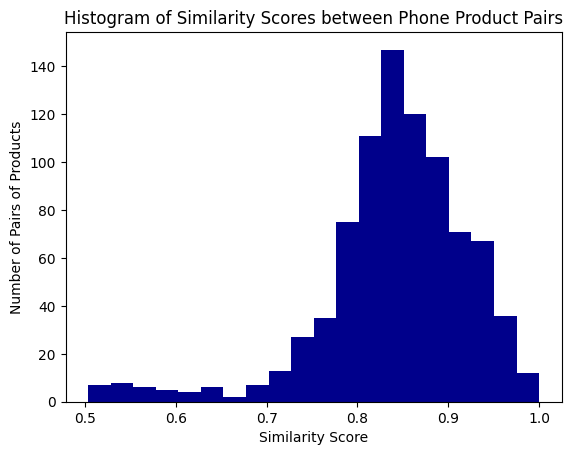

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Flatten the upper triangular part of the cosine similarity matrix
similarity_scores = cosine_sim_matrix[np.triu_indices(len(cosine_sim_df), k=1)]

# Plot the histogram of similarity scores
plt.hist(similarity_scores, bins=20, color='darkblue')
plt.xlabel('Similarity Score')
plt.ylabel('Number of Pairs of Products')
plt.title('Histogram of Similarity Scores between Phone Product Pairs')
plt.show()

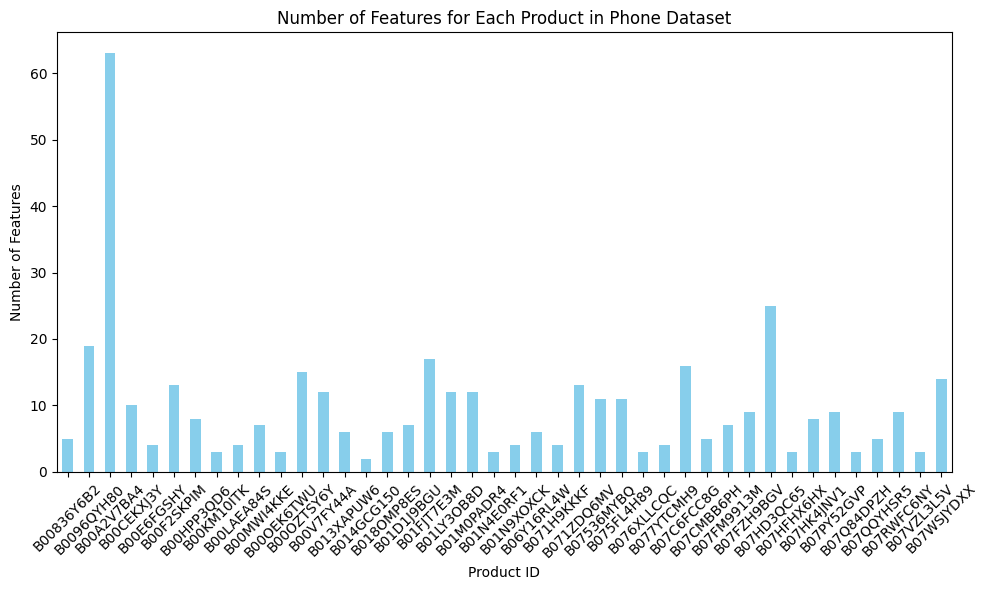

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of features for each product
product_feature_counts = feature_scores_df.groupby('product_id')['Feature'].nunique()

# Set figure size
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# Plot the number of features for each product
product_feature_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Number of Features')
plt.title('Number of Features for Each Product in Phone Dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming feature_scores_df is already loaded as described
# Pivot the DataFrame to get products as rows and features as columns with sentiment scores as values
pivot_df = feature_scores_df.pivot(index='product_id', columns='Feature', values='Sentiment Score')

# Fill NaN values with 0 or another appropriate value if there are any missing scores
pivot_df = pivot_df.fillna(0)

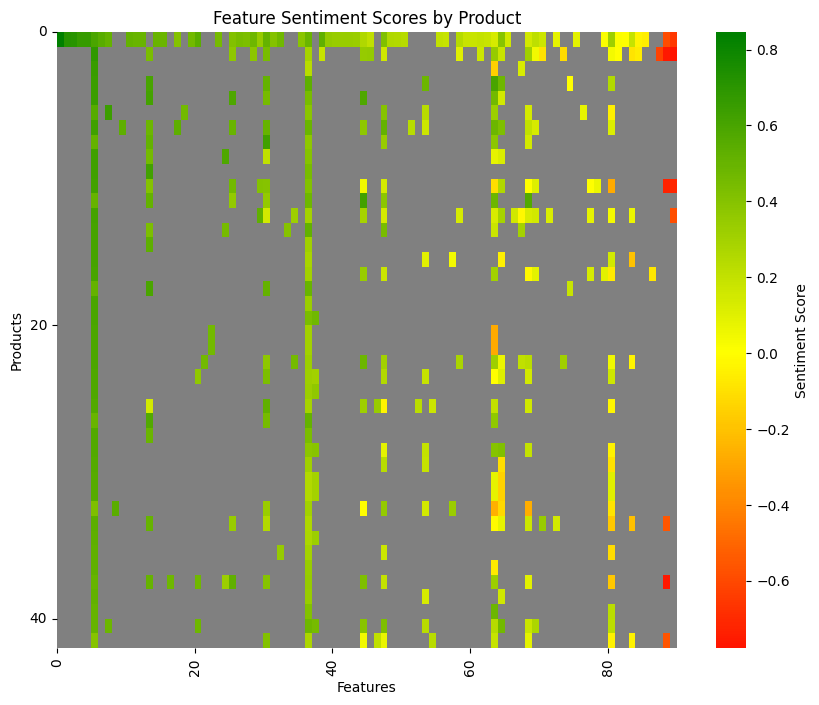

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_rgba

# Assuming feature_scores_df is already loaded
# Pivot the DataFrame
pivot_df = feature_scores_df.pivot(index='product_id', columns='Feature', values='Sentiment Score')

# Handle missing values by setting them to NaN
pivot_df = pivot_df.fillna(pd.NA)

# Sort rows by the maximum sentiment score per product
pivot_df['max_sentiment'] = pivot_df.max(axis=1)
pivot_df = pivot_df.sort_values(by='max_sentiment', ascending=False)
pivot_df = pivot_df.drop(columns='max_sentiment')

# Sort columns by the average sentiment score per feature
average_sentiments = pivot_df.mean().sort_values(ascending=False)
pivot_df = pivot_df[average_sentiments.index]

# Create a custom color map from red to yellow to green, with grey for NaN
cmap = LinearSegmentedColormap.from_list(
    "custom_red_yellow_green",
    [to_rgba('red'), to_rgba('yellow'), to_rgba('green')],
    N=256
)
cmap.set_bad('grey')  # Set color for NaN values

# Plotting
plt.figure(figsize=(10, 8))
ax = sns.heatmap(pivot_df, cmap=cmap, center=0, cbar_kws={'label': 'Sentiment Score'})

# Set title and labels
plt.title('Feature Sentiment Scores by Product')
plt.xlabel('Features')
plt.ylabel('Products')

# Define tick positions and labels for x-axis and y-axis
x_tick_positions = range(0, len(pivot_df.columns), 20)  # Adjust the step as needed
y_tick_positions = range(0, len(pivot_df.index), 20)   # Adjust the step as needed

ax.set_xticks(x_tick_positions)
ax.set_yticks(y_tick_positions)

ax.set_xticklabels([str(x) for x in x_tick_positions])
ax.set_yticklabels([str(y) for y in y_tick_positions])

# Rotate tick labels for better visibility
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

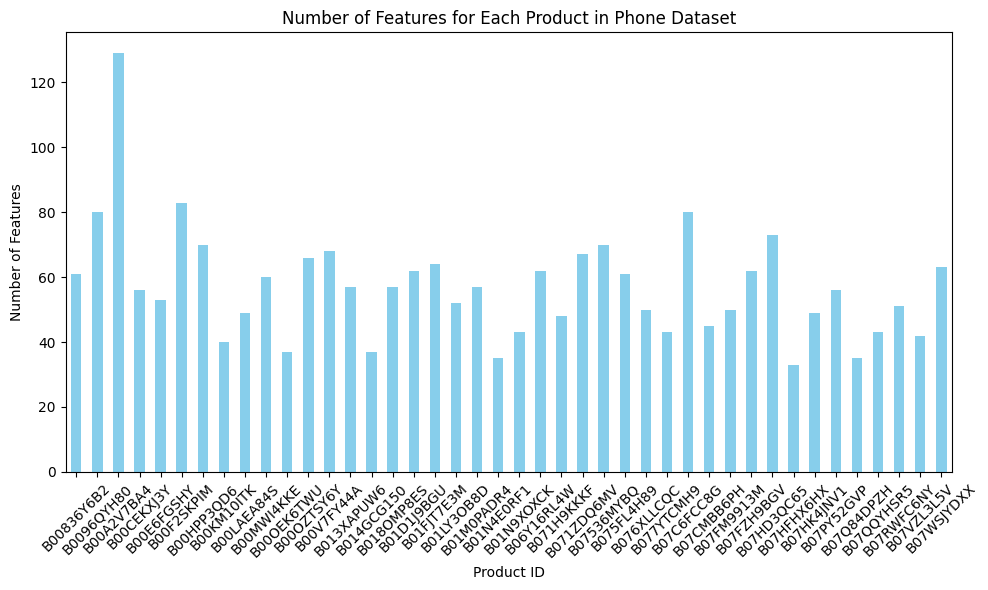

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['feature_count'] = df['sentiment_analysis'].apply(lambda x: len(x.keys()))

# Count the number of features for each product
product_feature_counts = df.groupby('asin')['feature_count'].nunique()

# Set figure size
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# Plot the number of features for each product
product_feature_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Number of Features')
plt.title('Number of Features for Each Product in Phone Dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
feature_scores_df

,product_id,Feature,Sentiment Score,Popularity Score
81,B00A2V7BA4,office,0.846154,0.111111
83,B00A2V7BA4,home,0.714286,0.104701
45,B00A2V7BA4,system,0.709677,0.132479
339,B07HD3QC65,work,0.682353,0.188053
55,B00A2V7BA4,hardware,0.661017,0.126068
...,...,...,...,...
203,B01FJT7E3M,problem,-0.714286,0.128440
197,B01FJT7E3M,issue,-0.727273,0.126147
345,B07HD3QC65,issue,-0.762887,0.214602
402,B07WSJYDXX,issue,-0.764045,0.115136


#Better Scores

In [ ]:
def better_score(df, query_product_id, candidate_product_id):
    query_sentiments = df[df['product_id'] == query_product_id].set_index('Feature')['Sentiment Score'].to_dict()
    candidate_sentiments = df[df['product_id'] == candidate_product_id].set_index('Feature')['Sentiment Score'].to_dict()

    better_scores = {}
    shared_features = set(candidate_sentiments.keys()).intersection(set(query_sentiments.keys()))

    for feature in shared_features:
        sent_c = candidate_sentiments[feature]
        sent_q = query_sentiments[feature]
        better_scores[feature] = (sent_c - sent_q) / 2

    # Calculate overall better score by averaging the scores of shared features
    if shared_features:
        overall_better_score = sum(better_scores.values()) / len(shared_features)
    else:
        overall_better_score = 0  # No shared features to compare

    return better_scores, overall_better_score

# Example usage
query_product_id = 'B00LAEA84S'
candidate_product_id = 'B07C6FCC8G'

better_scores, overall_better_score = better_score(feature_scores_df, query_product_id, candidate_product_id)
print("Better Scores:")
for feature, score in better_scores.items():
    print(f"{feature}: {score:.4f}")

print(f"\nOverall Better Score: {overall_better_score:.4f}")

Better Scores:
battery: 0.3161
work: -0.0102
phone: 0.1251

Overall Better Score: 0.1437


In [ ]:
def calculate_b1_b2(df, query_product_id, candidate_product_id):
    # Filter DataFrame to get sentiments for the query and candidate products
    sentiments_q = df[df['product_id'] == query_product_id].set_index('Feature')['Sentiment Score'].to_dict()
    sentiments_c = df[df['product_id'] == candidate_product_id].set_index('Feature')['Sentiment Score'].to_dict()

    features_q = set(sentiments_q.keys())
    features_c = set(sentiments_c.keys())
    shared_features = features_q.intersection(features_c)
    all_features = features_q.union(features_c)

    # Calculate B1 (Q, C)
    if shared_features:
        b1_numerator = sum((sentiments_c.get(f, 0) - sentiments_q.get(f, 0)) / 2 for f in shared_features)
        b1 = b1_numerator / len(shared_features)
    else:
        b1 = 0  # No shared features to compare

    # Calculate B2 (Q, C)
    b2_numerator = sum((sentiments_c.get(f, 0) - sentiments_q.get(f, 0)) / 2 for f in all_features)
    b2 = b2_numerator / len(all_features)

    return b1, b2

# Example usage
query_product_id = 'B00LAEA84S'
candidate_product_id = 'B07C6FCC8G'

b1, b2 = calculate_b1_b2(feature_scores_df, query_product_id, candidate_product_id)
print(f"B1 Score between Query Product and {candidate_product_id}: {b1:.2f}")
print(f"B2 Score between Query Product and {candidate_product_id}: {b2:.2f}")

B1 Score between Query Product and B07C6FCC8G: 0.14
B2 Score between Query Product and B07C6FCC8G: 0.16


In [ ]:
def calculate_score(similarity, sentiment, w):
    """
    Calculate the hybrid score combining similarity and sentiment.

    Parameters:
    similarity (float): The similarity score between Q and C.
    sentiment (float): The sentiment score between Q and C.
    w (float): The weight parameter controlling the influence of sentiment.

    Returns:
    float: The calculated score.
    """
    return (1 - w) * similarity + w * ((sentiment + 1) / 2)

# Example usage:
similarity_score = 0.785  # Example similarity score
sentiment_score = 0.875   # Example sentiment score
weight = 0.5            # Example weight

score = calculate_score(similarity_score, sentiment_score, weight)
print("Score between product B0096QYH80 and B00836Y6B2:", score)

Score between product B0096QYH80 and B00836Y6B2: 0.8612500000000001
